#**Submission Dicoding**

##Data Diri

Nama : Wilson Jonathan Oey

#Library dan Dataset


##Import Library

In [ ]:
import tensorflow as tf
import zipfile,os,shutil
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

##Pengecekan Versi Tensorflow

In [ ]:
tf.__version__

'2.3.0'

##Fetch dataset dari server

In [ ]:
%%time
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-10-31 07:15:06--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.75MB/s    in 46s     

2020-10-31 07:15:53 (6.74 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]

CPU times: user 309 ms, sys: 84.3 ms, total: 394 ms
Wall time: 46.8 s


##Ekstrak Dataset

In [ ]:
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

##Membuat Direktori


In [ ]:
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')
roc_dir = os.path.join(base_dir,'rock')
pap_dir = os.path.join(base_dir, 'paper')
sci_dir = os.path.join(base_dir, 'scissors')

In [ ]:
os.mkdir(train_dir)
os.mkdir(validation_dir)

##Split Dataset

In [ ]:
train_roc = os.path.join(train_dir, 'rock')
train_pap = os.path.join(train_dir, 'paper')
train_sci = os.path.join(train_dir, 'scissors')

In [ ]:
val_roc = os.path.join(validation_dir, 'rock')
val_pap = os.path.join(validation_dir, 'paper')
val_sci = os.path.join(validation_dir, 'scissors')

In [ ]:
os.mkdir(train_roc)
os.mkdir(train_pap)
os.mkdir(train_sci)

In [ ]:
os.mkdir(val_roc)
os.mkdir(val_pap)
os.mkdir(val_sci)

#Data Kuantitatif

##Total Keseluruhan Item

In [ ]:
print('Jumlah total gambar gunting adalah', str(int(len(os.listdir(sci_dir)))), 'item')
print('Jumlah total gambar batu adalah', str(int(len(os.listdir(roc_dir)))), 'item')
print('Jumlah total gambar kertas adalah', str(int(len(os.listdir(pap_dir)))), 'item')

Jumlah total gambar gunting adalah 750 item
Jumlah total gambar batu adalah 726 item
Jumlah total gambar kertas adalah 712 item


##Total Item untuk Data Training

In [ ]:
print('Jumlah total gambar gunting untuk data training adalah', str(int(len(os.listdir(train_sci)))), 'item')
print('Jumlah total gambar batu untuk data training adalah', str(int(len(os.listdir(train_roc)))), 'item')
print('Jumlah total gambar kertas untuk data training adalah', str(int(len(os.listdir(train_pap)))), 'item')

Jumlah total gambar gunting untuk data training adalah 450 item
Jumlah total gambar batu untuk data training adalah 435 item
Jumlah total gambar kertas untuk data training adalah 427 item


##Total Item untuk Data Validasi

In [ ]:
print('Jumlah total gambar gunting untuk data validasi adalah', str(int(len(os.listdir(val_sci)))), 'item')
print('Jumlah total gambar batu untuk data validasi adalah', str(int(len(os.listdir(val_roc)))), 'item')
print('Jumlah total gambar kertas untuk data validasi adalah', str(int(len(os.listdir(val_pap)))), 'item')

Jumlah total gambar gunting untuk data validasi adalah 300 item
Jumlah total gambar batu untuk data validasi adalah 291 item
Jumlah total gambar kertas untuk data validasi adalah 285 item


#Train & test Split

##Memecah setiap direktori menjadi data train dan data validasi (validasi 40% dari dataset)

In [ ]:
train_roc_dir, val_roc_dir = train_test_split(os.listdir(roc_dir), test_size = 0.40)
train_pap_dir, val_pap_dir = train_test_split(os.listdir(pap_dir), test_size = 0.40)
train_sci_dir, val_sci_dir = train_test_split(os.listdir(sci_dir), test_size = 0.40)

##Mencopy Semua Direktori

In [ ]:
for file in train_roc_dir:
  shutil.copy(os.path.join(roc_dir, file), os.path.join(train_roc, file))
for file in train_pap_dir:
  shutil.copy(os.path.join(pap_dir,file), os.path.join(train_pap,file))
for file in train_sci_dir:
  shutil.copy(os.path.join(sci_dir,file), os.path.join(train_sci,file))
for file in val_roc_dir:
  shutil.copy(os.path.join(roc_dir, file), os.path.join(val_roc,file))
for file in val_pap_dir:
  shutil.copy(os.path.join(pap_dir,file), os.path.join(val_pap,file))
for file in val_sci_dir:
  shutil.copy(os.path.join(sci_dir,file), os.path.join(val_sci,file))

#Membuat Image Data Generator

##Augmentasi Utama

###Train Data

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest',
)

###Test Data

In [ ]:
test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest'
)

##Generate Augmentasi Utama

###Train

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.


###Validasi

In [ ]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 876 images belonging to 3 classes.


#Membangun Arsitektur Sebuah CNN menggunakan Model Sequential

##Model Sequential

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

##Kompilasi Model

In [ ]:
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

#Callback dan Pelatihan Model

##Callback

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if not (0 < logs.get('accuracy') < 0.97):
      self.model.stop_training = True
      print("\nAkurasi sudah di atas 97%. Selesai training!")
callbacks = myCallback()

##Pelatihan Model

In [ ]:
%%time
history = model.fit(
    train_generator,
    steps_per_epoch = 20, # 1312 images = batch_size * steps
    epochs = 25,
    validation_data = validation_generator,
    validation_steps = 7, # 876 images = batch_size * steps
    verbose =2,
      callbacks=[callbacks]
)

Epoch 1/25
20/20 - 29s - loss: 1.0869 - accuracy: 0.3781 - val_loss: 0.9743 - val_accuracy: 0.6384
Epoch 2/25
20/20 - 28s - loss: 0.8114 - accuracy: 0.6313 - val_loss: 0.6574 - val_accuracy: 0.7188
Epoch 3/25
20/20 - 28s - loss: 0.5302 - accuracy: 0.8125 - val_loss: 0.2763 - val_accuracy: 0.8973
Epoch 4/25
20/20 - 28s - loss: 0.3478 - accuracy: 0.8734 - val_loss: 0.4584 - val_accuracy: 0.8080
Epoch 5/25
20/20 - 28s - loss: 0.2838 - accuracy: 0.9000 - val_loss: 0.3628 - val_accuracy: 0.8571
Epoch 6/25
20/20 - 28s - loss: 0.2356 - accuracy: 0.9203 - val_loss: 0.2227 - val_accuracy: 0.9330
Epoch 7/25
20/20 - 28s - loss: 0.1646 - accuracy: 0.9391 - val_loss: 0.2438 - val_accuracy: 0.9330
Epoch 8/25
20/20 - 28s - loss: 0.1934 - accuracy: 0.9250 - val_loss: 0.1493 - val_accuracy: 0.9598
Epoch 9/25
20/20 - 28s - loss: 0.1498 - accuracy: 0.9547 - val_loss: 0.1536 - val_accuracy: 0.9464
Epoch 10/25
20/20 - 28s - loss: 0.1045 - accuracy: 0.9688 - val_loss: 0.1647 - val_accuracy: 0.9286
Epoch 11/

#Grafik

##Gabungan Grafik Loss dan Akurasi

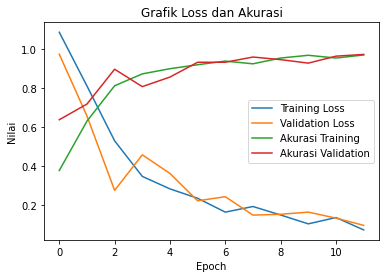

In [ ]:
#loss train & validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Akurasi Training')
plt.plot(history.history['val_accuracy'], label='Akurasi Validation')
plt.title('Grafik Loss dan Akurasi')
plt.ylabel('Nilai')
plt.xlabel('Epoch')
plt.legend(loc="best")
plt.show()

##Grafik Loss

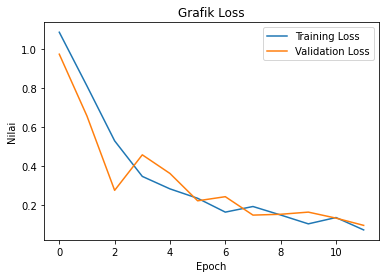

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Grafik Loss')
plt.ylabel('Nilai')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

##Grafik Akurasi

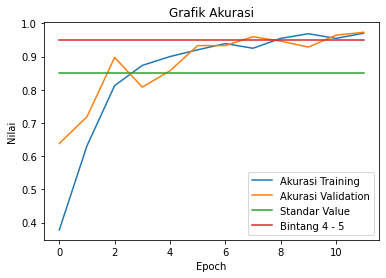

In [ ]:
plt.plot(history.history['accuracy'], label = 'Akurasi Training')
plt.plot(history.history['val_accuracy'], label = 'Akurasi Validation')
plt.plot([0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85], Label = 'Standar Value')
plt.plot([0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95], Label = 'Bintang 4 - 5')
plt.title('Grafik Akurasi')
plt.ylabel('Nilai')
plt.xlabel('Epoch')
plt.legend(loc="best")
plt.show()

#Input Gambar

Saving Hz5ynYPew6XqaLdO.png to Hz5ynYPew6XqaLdO.png
Hz5ynYPew6XqaLdO.png
Selected image is rock


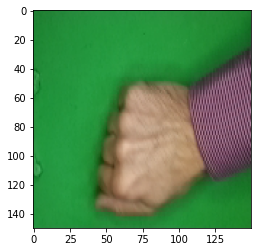

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if not classes[0,0]==0:
    print('Selected image is paper')
  elif not classes[0,1]==0:
    print('Selected image is rock')
  elif not classes[0,2]==0:
    print('Selected image is scissors')
  else:
    print('Selected image is nothing')